## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
import pickle
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

I notice that the small number of tokens appear very frequently, while the large number of tokens appears less frequently.

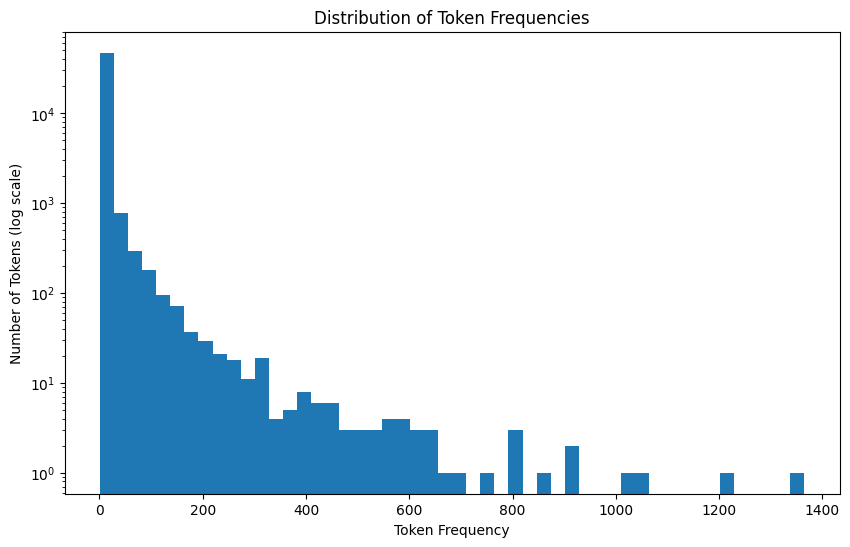

In [14]:
# Count how many times each token appears
token_count = Counter(all_tokens)

# Get list of (token, frequency) pairs
token_freq = token_count.most_common()

# Make a list of just the frequencies
frequencies = []
for pair in token_freq:
    freq = pair[1]
    frequencies.append(freq)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=50, log=True)
plt.xlabel('Token Frequency')
plt.ylabel('Number of Tokens (log scale)')
plt.title('Distribution of Token Frequencies')
plt.show()

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
Test: 0.6659 Training: 0.7670
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [15]:
#load data
phishing = pd.read_parquet('Phishing_clean.parquet')
phishing.head()
#1 -> scam
#0 -> not scam

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#do 80/20 split
X = phishing.drop(columns=['Email Type'])
y = phishing['Email Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Run a regression of  𝑦  on the one-hot-encoded emails.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate performance
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R^2 on the training set: {r2_train:.4f}")
print(f"R^2 on the test set: {r2_test:.4f}")

R^2 on the training set: 0.7670
R^2 on the test set: 0.6659


### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

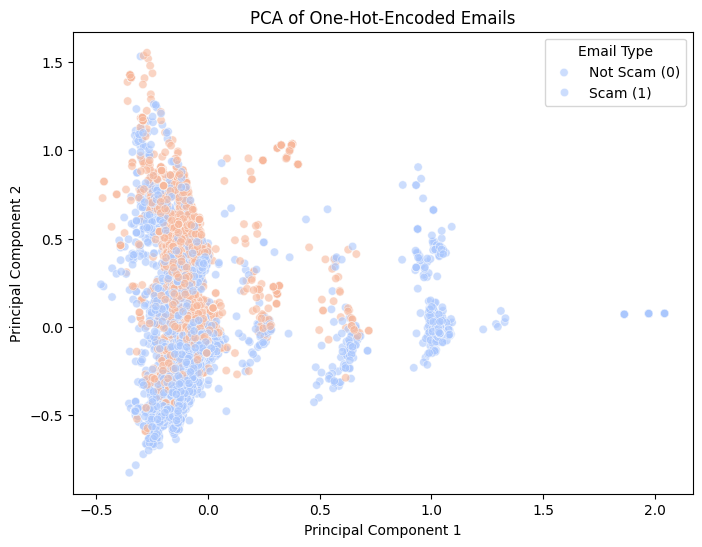

In [26]:
from sklearn.decomposition import PCA
import seaborn as sns

#create X abd y
X = phishing.drop(columns=['Email Type'])
y = phishing['Email Type']

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

new_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
new_pca['Email Type'] = y.values

#plot two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(
    data= new_pca,
    x='PC1', y='PC2',
    hue='Email Type',
    palette='coolwarm',
    alpha=0.6
)
plt.title('PCA of One-Hot-Encoded Emails')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Email Type', labels=['Not Scam (0)', 'Scam (1)'])
plt.show()

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.